# Feature Matching

### Import Library yang dibutuhkan

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Fungsi Penting

In [27]:
def show_image(title, img) :
    plt.figure(figsize= (5,5))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()


### Baca dan Tampilkan Scene Gambar

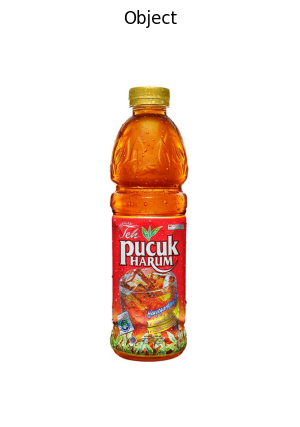

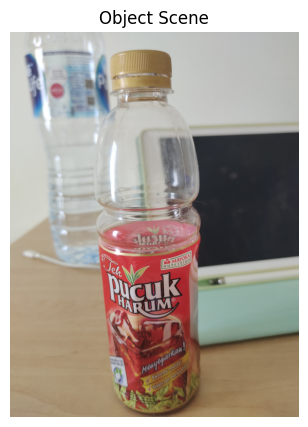

In [28]:
obj = cv2.imread('obj.jpg')
obj_scene = cv2.imread('obj_scene.jpg')

obj = cv2.cvtColor(obj, cv2.COLOR_BGR2RGB)
obj_scene = cv2.cvtColor(obj_scene, cv2.COLOR_BGR2RGB)

show_image('Object', obj)
show_image('Object Scene', obj_scene)


### Algoritma SIFT

Berikut adalah beberapa tahap implementasi dari algoritma SIFT :
1. Scale-space Extrema Detection <br>
Mengidentifikasi lokasi dan skala yang dapat berulang kali ditugaskan untuk melihat pandangan yang berbeda dari objek yang sama. 

Untuk mendeteksi lokasi keypoint, menggunakan fungsi Different of Gaussian yaitu

$$
D(x,y, \sigma) = (G(x,y,k\sigma) - G(x,y,\sigma)) * I(x,y) \\
D(x,y, \sigma) = L(x,y,k\sigma) - L(x,y,\sigma)
$$

Di mana $L$ diperoleh dari konvolusi antara skala variabel gaussian $G(x,y\sigma)$ dengan input image $I(x,y)$

$$
L(x,y,\sigma) = G(x,y,\sigma) * I(x,y)
$$

Dari poin ini diperoleh potential keypoint.

2. Keypoint Localization <br>
Setelah memperoleh potential keypoint, keypoint tersebut dilakukan thresholding untuk memperoleh strong keypoints.

3. Oritentation Assignment
4. Keypoint Decryptor

### Membuat Object Detector dan Mendeteksi Keypoint

Detector dapat dibuat dengan bantuan dari library CV2 yaitu .SIFT_create().

Setelah itu, dilakukan pendeteksian dengan menggunakan method .detectAndCompute() pada object dan object di scene


In [29]:
SIFT = cv2.SIFT_create() # Membuat object detector dengan .SIFT_create()
threshold = 100 # Menentukan nilai threshold

# Melakukan pendeteksian keypoint dan descriptor untuk objek dan scene
sift_kp_obj, sift_ds_obj = SIFT.detectAndCompute(obj, None)
sift_kp_obj_scene, sift_ds_obj_scene = SIFT.detectAndCompute(obj_scene, None)

### Matching : Brute Force Matcher

Brute Force akan memeriksa semua kemungkinan untuk matching sampai ditemukan matches mana yang terbaik.

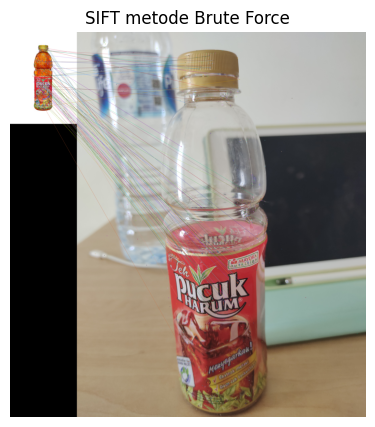

In [38]:
# Melakukan object matching dengan Brute Force Matcher
BF_matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck = True) # Cosntructor untuk BF Matcher
matches = BF_matcher.match(sift_ds_obj, sift_ds_obj_scene) # Melakukan matching dengan BF Matcher
matches = sorted(matches, key = lambda x:x.distance) # Hasil matches harus sorted

# Membuat gambar hasil object matching dengan BF Matcher dan threshold 100

result = cv2.drawMatches(obj, sift_kp_obj, obj_scene, sift_kp_obj_scene, matches[:threshold], None)

show_image('SIFT metode Brute Force', result)

### Matching : FLANN Force Matcher

FLANN adalah kepanjangan dari Fast Library for Approximate Nearest Neighbors. FLANN mencari matching yang terbaik tapi hanya aproksimasi. 

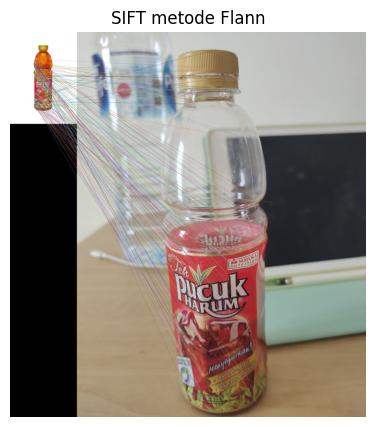

In [39]:
# Melakukan object matching dengan Flann Matcher
flann = cv2.FlannBasedMatcher(dict(algorithm = 1), dict(checks = 50)) # Constructor untuk Flann Matcher
matches = flann.knnMatch(sift_ds_obj, sift_ds_obj_scene, 2) # Melakukan matching dengan Flann Matcher

# Menggambarkan hasil object matching dengan Flann Matcher dengan threshold 100
result_flann = cv2.drawMatchesKnn(obj, sift_kp_obj, obj_scene, sift_kp_obj_scene, matches[:threshold], None, flags = 2)

show_image('SIFT metode Flann', result_flann)

### Perbedaan antara FLANN dan Brute Force

Brute Force memeriksa semua kemungkinan, sementara FLANN hanya mengambil aproksimasi.

Sudah pasti kendala pada Brute Force terdapat pada kecepatan dalam matching sementara FLANN sudah pasti lebih cepat daripada Brute Force namun hasil yang diperoleh belum tentu sebaik Brute Force.

Dalam kasus saya, BF Matcher melakukan matching dalam waktu 1.8s sementara FLANN hanya membutuhkan 1.7s
